# Assignment 5 - Hidden Markov Models
## Probabilistic Models UE
### WS 2016

---
<div class="alert alert-warning">
**Due:** 09.01.2017, 11:00
</div>

---

# Description

Little Mary wakes up in the middle of the night of Christmas eve. She heard some noise.
Probably Santa Clause is coming with her presents! It’s dark, and she is not allowed to leave
her room, so she cannot check where Santa currently is. She can only listen carefully to infer
where he might be.

Santa can be either **absent**, on his **sleigh**, in the **chimney** or at the Christmas **tree**. In order to
get to the Christmas tree, he has to go through the chimney, because the doors are locked.
When he’s absent, there will be most probably silence, when he’s on the sleigh there will be
probably some crackle or rumbling, in the chimney there will be most probably rumbling, and
when he’s at the Christmas tree putting the presents in place, there might be some crackle.

The following image shows the HMM modelling this situation, including transition probabilities.

<img style='width:100%;  max-width:400px;' src="hmm.svg">

The following tables show the observation probabilities...

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;margin:0px auto;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-lqy6{text-align:right;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-baqh" colspan="2" rowspan="2">$P(o^{(t)} \mid S^{(t)})$</th>
    <th class="tg-baqh" colspan="4"><center>$S^{(t)}$</center></th>
  </tr>
  <tr>
    <td class="tg-baqh">a</td>
    <td class="tg-baqh">s</td>
    <td class="tg-baqh">c</td>
    <td class="tg-baqh">t</td>
  </tr>
  <tr>
    <td class="tg-baqh" rowspan="3">$o^{(t)}$<br></td>
    <td class="tg-lqy6">silence</td>
    <td class="tg-baqh">0.7</td>
    <td class="tg-baqh">0.1</td>
    <td class="tg-baqh">0.2</td>
    <td class="tg-baqh">0.1</td>
  </tr>
  <tr>
    <td class="tg-lqy6">rumbling</td>
    <td class="tg-baqh">0.15</td>
    <td class="tg-baqh">0.4</td>
    <td class="tg-baqh">0.7</td>
    <td class="tg-baqh">0.3</td>
  </tr>
  <tr>
    <td class="tg-lqy6">crackle</td>
    <td class="tg-baqh">0.15</td>
    <td class="tg-baqh">0.5</td>
    <td class="tg-baqh">0.1</td>
    <td class="tg-baqh">0.6</td>
  </tr>
</table>

... and the initial probabilities.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;margin:0px auto;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-s6z2{text-align:center}
</style>
<table class="tg">
  <tr>
    <th class="tg-s6z2" colspan="4"><center>$P(S^{(0)})$</center></th>
  </tr>
  <tr>
    <td class="tg-s6z2">a</td>
    <td class="tg-s6z2">s</td>
    <td class="tg-s6z2">c</td>
    <td class="tg-s6z2">t</td>
  </tr>
  <tr>
    <td class="tg-031e">0.6</td>
    <td class="tg-031e">0.1</td>
    <td class="tg-031e">0.2</td>
    <td class="tg-031e">0.1</td>
  </tr>
</table>



---
# 1. Where is Santa? Find out using Hidden Markov Models.

Since Hidden Markov Models are not (yet) in the curriculum of elementary school, Mary needs
your help to find out the whereabouts of Santa. Implement some of the common inference
algorithms for HMMs, using the following datastructure to store the probability tables. Code to test your implementations is available in the second part of this assignment.

In [1]:
from __future__ import print_function
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
class HMM:
    def __init__(self, pi, A, B):
        """
        Datastructure that holds the probability tables for
        a discrete observation HMM.

        :param pi: Initial probabilities
        :param A: Transition probabilities
        :param B: Observation probabilities
        """
        
        self.pi = pi
        self.A = A
        self.B = B
        self.num_states = len(pi)

## 1.1 Implement filtering using the forward algorithm. (3 points)

The function should return the filtering distribution $P(S^{(t)} \mid o^{(1:t)})$ for each time step t. This corresponds to $\mathbf{f}^{(1:0)}, \mathbf{f}^{(1:1)}, \ldots, \mathbf{f}^{(1:T)}$ in the lecture slides, where $T$ is the length of the observation sequence.

In [3]:
#missing how to normalize
#def backward(hmm, observations):
#    if np.empty(observations):
#        return hmm.pi
#    else:
#        return np.multiply(np.transpose(B[observations[-1]]),np.dot(np.transpose(A),backward(hmm,observations[0:len(observations)-1]))

In [4]:
import numpy as np
def forward(hmm, observations):
    """
    Computes the filtering distribution (forward messages) for a given 
    Hidden Markov Model and observations.
    
    :param hmm: HMM datastructure
    :param observations: Numpy array containing the observations

    :return f: filtering distribution (each row represents a time step)
    """
 
    f = np.zeros(((len(observations)+1,hmm.num_states)))
    f[0,:] = hmm.pi
    for count,o in enumerate(observations):
        P_Stp1_g_Ot   = np.dot(np.transpose(hmm.A),f[count,:])
        P_Stp1_g_Otp1 = np.multiply(np.transpose(hmm.B[o,:]),P_Stp1_g_Ot)
        f[count+1,:] = P_Stp1_g_Otp1/sum(P_Stp1_g_Otp1)
        current_msg = P_Stp1_g_Otp1
    
    return f



## 1.2 Implement the backward function needed for smoothing. (3 points)
The function should return the backward messages $P(o^{(t+1:T)}\mid S^{(t)})$ for each time step $t$. This corresponds to ($\mathbf{b}^{(1:T)},  \mathbf{b}^{(2:T)}, ... , \mathbf{b}^{(T+1:T)}$ in the lecture slides. 

In [5]:
def backward(hmm, observations):
    """
    Computes the backward messages for a given 
    Hidden Markov Model and observations.
    
    :param hmm: HMM datastructure
    :param observations: Numpy array containing the observations

    :return b: backward messages (each row represents a time step)
    """
    
    b = np.ones((len(observations)+1,hmm.num_states))
    #print(b.shape)
    #c[-1,:] = np.ones(len(hmm.pi))
    for count,o in enumerate(reversed(observations)):
        b[-(count+2),:] = np.matmul(hmm.A,(np.multiply(np.transpose(hmm.B[o,:]),b[-(count+1),:])))
    return b

#backward(model,obs)

## 1.3 Based on 1.1 and 1.2, implement smoothing using the forward-backward algorithm (3 points)

The function should return the smoothing distribution $P({S}^{(t)} \mid o^{(1:T)})$ for each time step.


In [6]:
def forward_backward(hmm, observations):
    """
    Computes the posterior (smoothing distribution) for a given 
    Hidden Markov Model and observations.
    
    :param hmm: HMM datastructure
    :param observations: Numpy array containing the observations

    :return post: posterior distribution (each row represents a time step)

    """
    
    post = np.multiply(forward(hmm,observations),backward(hmm,observations))
    for k,i in enumerate(post):
        post[k] =  (i/sum(i))
    
    return post

## 1.4 Implement decoding using the Viterbi algorithm. (3 points)

The function should return an array containing the most probable state sequence, where each state is represented as integer ($a\ldots 0, s\ldots 1, c \ldots 2, t \ldots 3$) and the Viterbi messages ($\mathbf{v}^{(1:0)},  \mathbf{v}^{(1:1)}, ... , \mathbf{v}^{(1:T)}$ in the lecture slides).


In [7]:
def viterbi_1(hmm, observations):
    """
    Computes the most probable state sequence for a given
    Hidden Markov Model and observations.
    
    :param hmm: HMM datastructure
    :param observations: Numpy array containing the observations

    :return path: Numpy array of state ids representing the most probable state sequence
    :return v: Viterbi messages (each row represents a time step)
    """
    v = np.zeros((len(observations)+1,hmm.num_states))
    BackP = np.zeros((len(observations)+1,hmm.num_states),dtype=int)
    path = np.zeros(len(observations)+1,dtype=int)
    
    v[0,:] = hmm.pi
    
    for count, o in enumerate(observations):
        for state_t in range(0,hmm.num_states):                
            v[count+1,state_t] = np.max(np.multiply((v[count,:]),hmm.A[:,state_t]))*hmm.B[o,state_t]
        v[count+1,:] = v[count+1,:]/sum(v[count+1,:])
        BackP[count,:] = v[count+1,:].argmax(0)
    
    return path, v
%pylab inline
from itertools import izip
import time, sys
from matplotlib import animation
from matplotlib import gridspec
#I have implemented the function viterbi_1 and it works fine for the v but not for the path
#So, I got the below virterbi function from somewhere to compute the function, so that I can compute the path and answer the rest of the questions
#HOWEVER,I DIDNT IMPLEMENT THE BELOW FUNCTION
def viterbi(hmm, observations):
    
    vs = np.empty((len(observations) + 1, hmm.num_states))
    bps = np.empty_like(vs, dtype=int)

    vs[0] = hmm.pi

    for v_prev, v, bp, obs in izip(vs[:-1], vs[1:], bps[1:], observations):
        tmp = v_prev[:,newaxis] * hmm.A * hmm.B[obs]
        
        bp[:] = tmp.argmax(0)
        v[:] = tmp.max(0)
        v /= v.sum()

    path = np.empty(len(observations) + 1, dtype=int)
    path[-1] = vs[-1].argmax()
    for i in range(len(path)-2, -1, -1):
        path[i] = bps[i+1, path[i+1]]
    print(path)
    return path, vs

Populating the interactive namespace from numpy and matplotlib


---
# 2. Where is Santa? Sequence of Most Probable States vs. Most Probable State Sequence

Little Mary stays awake and writes down everything she hears. Using her observations,
reason about Santa's position at each time step.

## 2.1 Run the algorithms (filtering, smoothing, Viterbi)... (3 points)

... on Mary's observation data (see the provided observation sequence below) using the model defined above. For the filtering and smoothing results, compute the most probable state at each time step. Again, represent the states as integers
($a\ldots 0, s\ldots 1, c \ldots 2, t \ldots 3$). Visualise the results using the function provided.


In [8]:
pi = np.array([0.6,0.1,0.2,0.1])
A = np.array([[0.8,0.2,0,0],[0.1,0.5,0.4,0],[0,0.4,0.2,0.4],[0,0,0.4,0.6]])
B = np.array([[0.7,0.1,0.2,0.1],[0.15,0.4,0.7,0.3],[0.15,0.5,0.1,0.6]])


model = HMM(pi, A, B)

# Mary's observations - 0 .. silence, 1 .. rumbling, 2 .. crackle
obs = np.array([0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0])

# TODO: run the algorithms...

In [9]:
def test_algos(fwd, fwdbckwd, vt, vtp):
    """
    Function that checks if the results correspond to the true results for the first four
    observations steps given above.

    :param fwd: forward variables given to check
    :param fwdbckwd: values returned by the forward-backward algorithm
    :param vt: values returned by the Viterbi algorithm
    :param vtp: path returned by the Viterbi algorithm
    """
    
    true_fwd = array([[ 0.6,         0.1,         0.2,         0.1       ],
                      [ 0.84482759,  0.06157635,  0.0591133,   0.03448276],
                      [ 0.92839352,  0.04344286,  0.0195421,   0.00862152],
                      [ 0.51085273,  0.39245151,  0.0789305,   0.01776526]])
    
    true_fwdbckwd = array([[ 0.96659674,  0.02416955,  0.00703611,  0.0021976 ],
                           [ 0.97976763,  0.01421742,  0.00399243,  0.00202252],
                           [ 0.97347945,  0.01993453,  0.00546928,  0.00111674],
                           [ 0.88245172,  0.11145663,  0.00505841,  0.00103324]])
 
    true_viterbi = array([[ 0.6,         0.1,         0.2,         0.1       ],
                          [ 0.92307692,  0.03296703,  0.02197802,  0.02197802],
                          [ 0.95843521,  0.03422983,  0.00488998,  0.00244499],
                          [ 0.56976744,  0.37984496,  0.04748062,  0.00290698]])

    true_viterbi_path = array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

    epsilon = 1E-8
    print("Forward (probably) OK!" if allclose(fwd[:4], true_fwd) else "Forward FAIL!")
    print("Forward-Backward (probably) OK!" if allclose(fwdbckwd[:4], true_fwdbckwd) else "Forward-Backward FAIL!")
    print("Viterbi (probably) OK!" if allclose(vt[:4], true_viterbi) else "Viterbi FAIL!")
    print("Viterbi path (probably) OK!" if (vtp[:11] == true_viterbi_path).all() else "Viterbi path FAIL!")

In [10]:
# TODO: test your code...
fw = forward(model,obs)
fwbk = forward_backward(model,obs)
get_res = viterbi(model,obs)
test_algos(fw,fwbk,get_res[1],get_res[0])

[0 0 0 0 0 0 0 0 0 0 1 1 2 3 2 3 3 3 2 3 3 2 1 1 0 0 0 0 0 0 0]
Forward (probably) OK!
Forward-Backward (probably) OK!
Viterbi (probably) OK!
Viterbi path (probably) OK!


In [11]:
def plot_states(path, values, title=None):
    """
    Plots the results of a algorithm. Black is 1, white is 0.

    :param path: List or array of state ids
    :param values: detailed values returned by the algorithm (forward-variables, ...)
    :param title: Title of the plot
    """
    
    f = figure(figsize=(12,4))
    ax = f.add_subplot(111)
    if title is not None:
        ax.set_title(title)
                    
    img = ax.imshow(values.T, interpolation='none', cmap=cm.Greys, vmin=0, vmax=1)
    
    yticks = range(values.shape[1])
    ax.set_yticks(yticks)

    state_enc = ['absent', 'sleigh', 'chimney', 'tree']
    ax.set_yticklabels([state_enc[yt] for yt in  yticks])
    
    ax.set_xticks(range(values.shape[0]))
    ax.set_xlabel('Time')
    
    ax.tick_params(top='off', right='off', left='off')
    
    for i in range(len(path)-1):
        ax.arrow(i+0.1, path[i], 0.9, path[i+1] - path[i], length_includes_head=True, head_width=0.25, fc='r', ec='r')
        
    return img

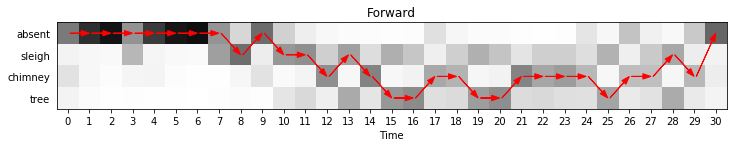

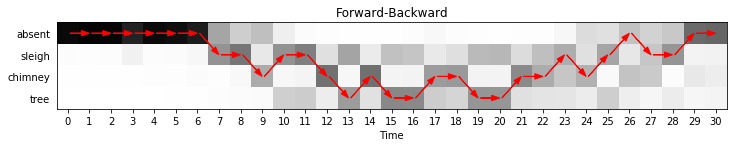

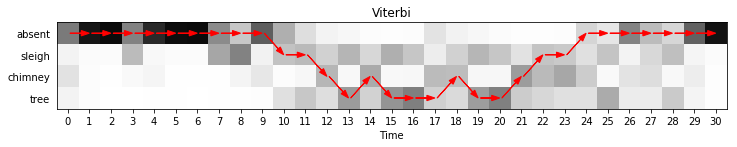

In [12]:
# TODO: plot state sequences ...
plot_states(fw.argmax(1), fw, title='Forward')
plot_states(fwbk.argmax(1), fwbk, title='Forward-Backward')
plot_states(get_res[0], get_res[1], title='Viterbi')

## 2.2 Explain the difference between the results of each algorithm. (3 points)

Does the forward algorithm yield a valid state sequence? Does the
forward-backward algorithm? Does the Viterbi algorithm? If not, why?  Which of
the algorithms guarantees to yield a valid state sequence, and which does not?
Explain!


The forward algorithm doesnt lead to correct results as the probabilty of going from chimney to absent is zero.
The forward backward and the verterbi algorithm led to a valid state sequence. 

---
# 3. BONUS EXERCISES

If you feel motivated and want to gain some extra points, solve the following
two exercises:

## 3.1 Design a Hidden Markov Model. (3 extra points)

Design a model (initial, transition and observation probabilities) and an observation sequence for which only one of the algorithms (as used in 2.1) returns a valid state sequence. Run the three algorithms and plot the results as before.

[3 0 0 0 0 1 2]
[3 0 0 0 0 1 2]


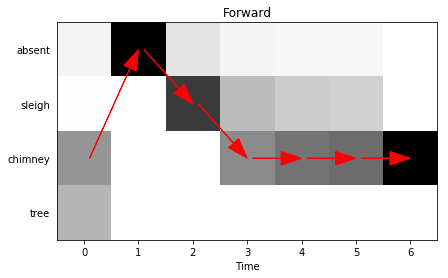

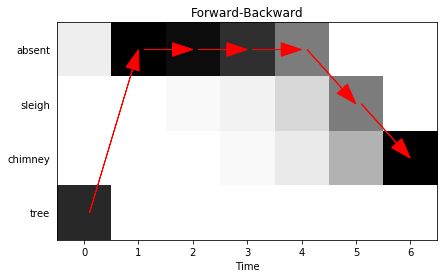

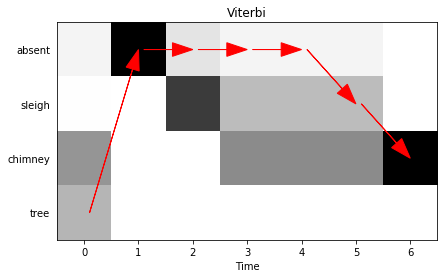

In [13]:
# PI
PI = array([0.09, 0.01, 0.5, 0.4])
# Transition model 
A_Mat = array([[0.7, 0.3, 0.0, 0.0], 
                [0.0, 0.0, 1.0, 0.0], 
                [0.0, 0.0, 0.7, 0.3],
                [1.0, 0.0, 0.0, 0.0]])
# Observation model 
B_Mat = array([[0.9, 0.0, 0.0, 0.0],
             [0.1, 1.0, 0.1, 0.0],
             [0.0, 0.0, 0.9, 0.0],
             [0.0, 0.0, 0.0, 1.0]])

model_try = HMM(PI, A_Mat, B_Mat)

obs_try = np.array([0, 1, 1, 1, 1, 2])

fw_1 = forward (model_try, obs_try)
bw_1 = backward (model_try, obs_try)
fw_bw_1 = forward_backward(model_try, obs_try)
_, vt_1 = viterbi (model_try, obs_try)
path_1, _ = viterbi (model_try, obs_try)

plot_states(fw_1.argmax(1), fw_1, title='Forward')
plot_states(fw_bw_1.argmax(1), fw_bw_1, title='Forward-Backward')
plot_states(path_1, vt_1, title='Viterbi')

# Implement the Baum-Welch algorithm for parameter learning. (10 extra points)

The algorithm takes a given HMM, an observation sequence and the number of iterations as parameters. Run your
algorithm using the given model as initial guess, and adapt the parameters using the observation sequence used in 2.

In [14]:
def baum_welch(hmm, observations, iterations):
    """
    BONUS EXERCISE!

    Adapts the transition and observation probabilities using the given observation
    sequence.
    
    :param hmm: HMM datastructure
    :param observations: Numpy array containing the observations
    :param iterations: Number of iterations for the baum-welch algorithm

    :return hmm: Adapted HMM datastructure
    """
    
    return hmm